**Welcome to Financial Fraud Detetcion**

In [1]:
!pip install "dask[complete]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 61.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.4/205.4 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 74.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 9.6 MB/s eta 0:00:00
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.6.4
    Uninstalling importlib-metadata-4.6.4:
      Successfully uninstalled importlib-metadata-4.6.4


In [4]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing Libraries

In [2]:

# Import necessary libraries
import pyarrow.parquet as pq
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from pathlib import Path
import dask.dataframe as dd

**Exploratory Data Analysis**


**Data with banker's account :0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af**

In [37]:
data_dir = Path('/content/drive/MyDrive/Data_hasking_with_banker_account')
ddf = dd.read_parquet(str(data_dir / '*.parquet'))
ddf

,CUST_CUSTNO,ACC_BUSINESSTYPE,ACC_ACCNO,ACC_BUSINESSNO,ACC_CURRENCYISO,BUSINESSNO_TRANS,FK_CURRENCY,AMOUNT,AMOUNTORIG,BRANCH_OFFICE,CONTRA_ACCNO,CONTRA_ZIP,CONTRA_NAME,CSHYN,REASON1,REASON2,REASON4,TR_FLAG_01,ANALYTICAL_TRANS_CODE,TR_SP_01,TR_SP_02,TR_SP_03,TR_SP_04,TR_SP_05,TR_SP_10,VALUEDATE
npartitions=184,,,,,,,,,,,,,,,,,,,,,,,,,,
,string,string,string,string,string,string,string,float64,float64,string,string,string,string,string,string,string,string,string,string,string,string,string,string,string,float64,string
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [38]:
from dask.diagnostics import ProgressBar, ResourceProfiler, CacheProfiler

with ProgressBar():
    df = ddf.compute()

[########################################] | 100% Completed | 580.17 s


In [13]:

# List to store transaction filenames
transaction_filenames = []

# Iterate over each file in the directory
for filename in os.listdir(data_dir):
    if filename.endswith(".parquet"):
        transaction_filenames.append(filename)

# Print the list of transaction filenames
print("Transaction filenames:")
for filename in transaction_filenames:
    print(filename)

Transaction filenames:
DATA_TB_TRANSACTIONS_20230801.parquet
DATA_TB_TRANSACTIONS_20230802.parquet
DATA_TB_TRANSACTIONS_20230803.parquet
DATA_TB_TRANSACTIONS_20230804.parquet
DATA_TB_TRANSACTIONS_20230805.parquet
DATA_TB_TRANSACTIONS_20230806.parquet
DATA_TB_TRANSACTIONS_20230807.parquet
DATA_TB_TRANSACTIONS_20230808.parquet
DATA_TB_TRANSACTIONS_20230809.parquet
DATA_TB_TRANSACTIONS_20230810.parquet
DATA_TB_TRANSACTIONS_20230811.parquet
DATA_TB_TRANSACTIONS_20230812.parquet
DATA_TB_TRANSACTIONS_20230813.parquet
DATA_TB_TRANSACTIONS_20230814.parquet
DATA_TB_TRANSACTIONS_20230815.parquet
DATA_TB_TRANSACTIONS_20230816.parquet
DATA_TB_TRANSACTIONS_20230817.parquet
DATA_TB_TRANSACTIONS_20230818.parquet
DATA_TB_TRANSACTIONS_20230820.parquet
DATA_TB_TRANSACTIONS_20230822.parquet
DATA_TB_TRANSACTIONS_20230823.parquet
DATA_TB_TRANSACTIONS_20230824.parquet
DATA_TB_TRANSACTIONS_20230826.parquet
DATA_TB_TRANSACTIONS_20230827.parquet
DATA_TB_TRANSACTIONS_20230828.parquet
DATA_TB_TRANSACTIONS_202308

In [39]:
# Print the head of the dataframe
print(df.head())

                                         CUST_CUSTNO ACC_BUSINESSTYPE  \
0  a168d638771f6240e978956399d9f16621b02655b20ae8...             CARD   
1  4fd201b58b6b81ad3366160ff82f3d53f622e0290a57db...             CARD   
2  52dcdc6af49899ae1dfae36d4eee1625fe717ac6897c2b...             CARD   
3  db34f14574441e3f42d7ea1d5299204ea481f9ac8f5ff5...             CARD   
4  49454b2d0968a2714066486a540ac8f0a57ee432cc3ca4...             CARD   

                                           ACC_ACCNO  \
0  432a9ae3afb5774dbb60c0f091dbd08193eaa4161d08ef...   
1  3d1eaec79cbbaad7f4b8019b874ab4fe327f490e32ab4c...   
2  8c3b276a636351fae92fe15ec81a2c1835f54f394fea69...   
3  a7c0264cb2746c27921013f13b7326c2a1d4e2a7ec41ad...   
4  41f062e47151420fa96091222e6be31458d670f623edae...   

                                      ACC_BUSINESSNO ACC_CURRENCYISO  \
0  0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af...             VND   
1  0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af...             VND   
2  0553d

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128047199 entries, 0 to 1031063
Data columns (total 26 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   CUST_CUSTNO            string 
 1   ACC_BUSINESSTYPE       string 
 2   ACC_ACCNO              string 
 3   ACC_BUSINESSNO         string 
 4   ACC_CURRENCYISO        string 
 5   BUSINESSNO_TRANS       string 
 6   FK_CURRENCY            string 
 7   AMOUNT                 float64
 8   AMOUNTORIG             float64
 9   BRANCH_OFFICE          string 
 10  CONTRA_ACCNO           string 
 11  CONTRA_ZIP             string 
 12  CONTRA_NAME            string 
 13  CSHYN                  string 
 14  REASON1                string 
 15  REASON2                string 
 16  REASON4                string 
 17  TR_FLAG_01             string 
 18  ANALYTICAL_TRANS_CODE  string 
 19  TR_SP_01               string 
 20  TR_SP_02               string 
 21  TR_SP_03               string 
 22  TR_SP_04             

In [83]:
df['CUST_CUSTNO'].value_counts()

CUST_CUSTNO
7b743982a30f2f716c18960f622094f0017083368e07e5...    2967518
090b24e00336e8d1b7b46c91dd73a1af61a50f7a0bd6e7...    1108086
39d1ac7e58a26d9ef994ca4e7204492145885892f650de...     424038
000f99e1d656961a9b6c86837647f0b7aae4a67b2e321d...     298953
674e43b781a309aa08f2b8d76ba3abbd136c1a9153b2fc...     220425
                                                      ...   
69b74f1385ac0ae27f1bcde08acab7d674bd79a83c7e89...          1
2953709b026aaabfb7abe147ae764a57e4bfb9fd723f4f...          1
18d94197bbe059682689d4b960d04e61b992453ba859e8...          1
8a346f635082f812d5d9937e28f6c5e3be918650edf21d...          1
9726e3761c4dea19a64b6eb872f073cb7a6d8512647077...          1
Name: count, Length: 990471, dtype: int64[pyarrow]

In [44]:
df.describe()

,AMOUNT,AMOUNTORIG,TR_SP_10
count,1.280472e+08,1.280472e+08,131954.000000
mean,-1.503134e+01,1.073551e+02,5586.447966
std,8.730070e+06,1.356798e+07,873.870456
min,-5.124000e+09,-3.800000e+10,743.380000
25%,-5.000000e+02,-5.000000e+02,5418.132500
50%,0.000000e+00,0.000000e+00,5747.845000
75%,3.000000e+02,3.000000e+02,6032.820000
max,5.124000e+09,3.800000e+10,9492.470000


In [45]:

print(df.shape)


(128047199, 26)


In [46]:
# Print the number of transaction files
print(f"Number of transaction files: {len(transaction_filenames)}")

Number of transaction files: 184


In [47]:

print(df.columns)


Index(['CUST_CUSTNO', 'ACC_BUSINESSTYPE', 'ACC_ACCNO', 'ACC_BUSINESSNO',
       'ACC_CURRENCYISO', 'BUSINESSNO_TRANS', 'FK_CURRENCY', 'AMOUNT',
       'AMOUNTORIG', 'BRANCH_OFFICE', 'CONTRA_ACCNO', 'CONTRA_ZIP',
       'CONTRA_NAME', 'CSHYN', 'REASON1', 'REASON2', 'REASON4', 'TR_FLAG_01',
       'ANALYTICAL_TRANS_CODE', 'TR_SP_01', 'TR_SP_02', 'TR_SP_03', 'TR_SP_04',
       'TR_SP_05', 'TR_SP_10', 'VALUEDATE'],
      dtype='object')


In [49]:
 # Group by account number and count the number of transactions

transaction_count_by_account = df.groupby('ACC_ACCNO').size()
print(transaction_count_by_account)


ACC_ACCNO
000009d475fedd818548469528d37141aea897d3b1c16d...      5
000012e3ee3b1003234f08329ec5570afc3877f8691ed9...      4
000015a1c02d9a2235897738b1022f6957cda9b11dd846...      3
0000199bec00d60d031f591c174cf9fe9d27dfc82ccddb...      6
00001c78f5926b235fa917253ee97ba00b34e25ecea811...     69
                                                    ... 
ffffebc8b1d52ed7878883c2601ea11cac2f62d5b048f9...      4
fffff5b0e424a7298ff138927ee92a16049c8c194992bd...      2
fffffb9ff061f01792e4ddda8e8fe69239cc6305bbb7c3...    210
fffffbc1b032ad0c7c418e7b1ef8d67acf14e446cdf600...      1
fffffe12e6ede237dcaea069acb7c0ab20e505178412d1...      7
Length: 2411166, dtype: int64


In [50]:
df[["CONTRA_ACCNO"]].describe()

,CONTRA_ACCNO
count,128047199
unique,1
top,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af...
freq,128047199


In [51]:
# Check the summary statistics of the AMOUNT column
print(df['AMOUNT'].describe())

count    1.280472e+08
mean    -1.503134e+01
std      8.730070e+06
min     -5.124000e+09
25%     -5.000000e+02
50%      0.000000e+00
75%      3.000000e+02
max      5.124000e+09
Name: AMOUNT, dtype: float64


In [52]:
transaction_count_df = transaction_count_by_account.reset_index()
transaction_count_df.columns = ['ACC_ACCNO', 'Transaction Count']
transaction_count_df.columns

Index(['ACC_ACCNO', 'Transaction Count'], dtype='object')

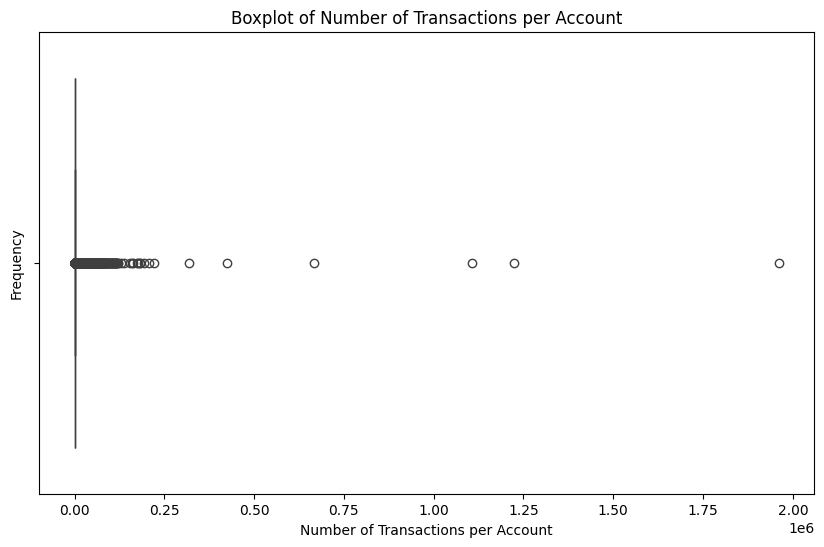

In [53]:
# Plot the boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x=transaction_count_df['Transaction Count'])
plt.xlabel('Number of Transactions per Account')
plt.ylabel('Frequency')
plt.title('Boxplot of Number of Transactions per Account')
plt.show()

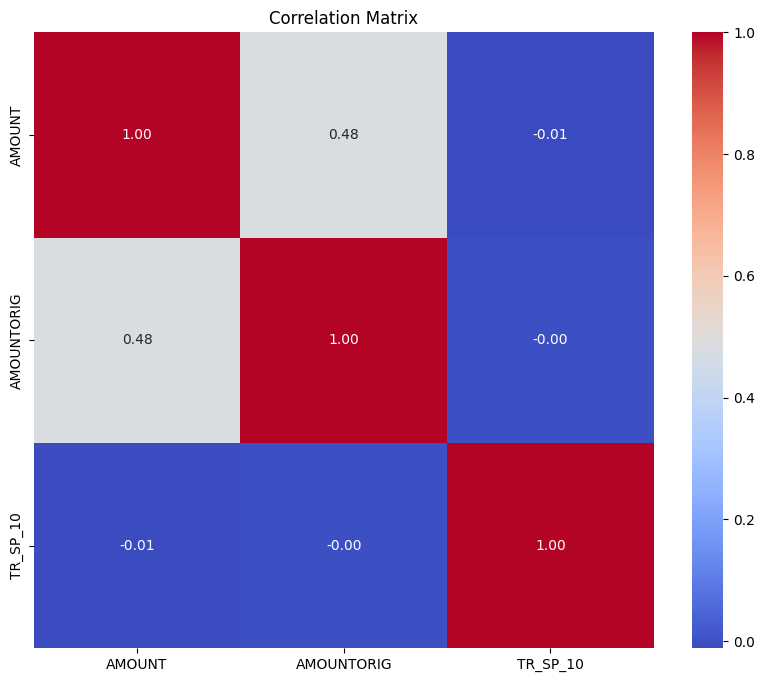

In [54]:

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


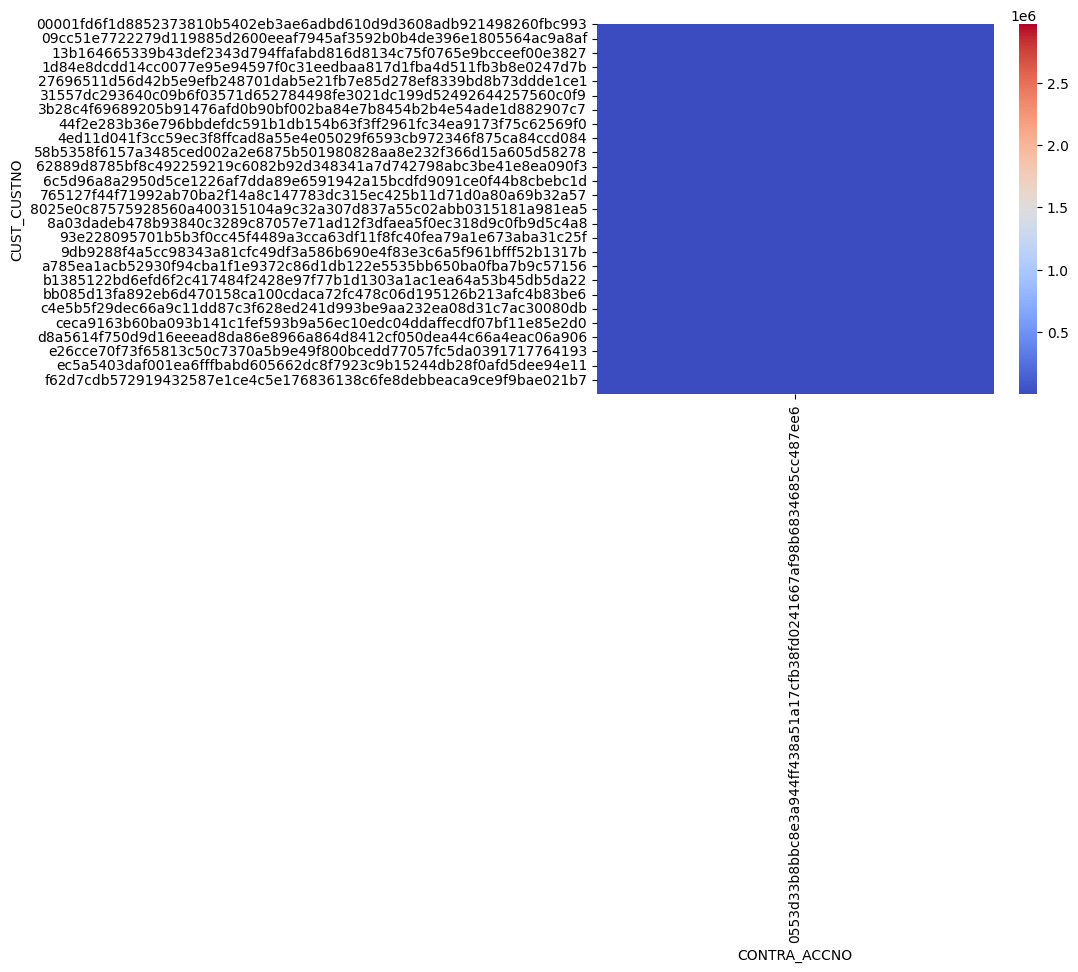

In [56]:

# Create a pivot table of the number of transactions by both accounts
transactions_by_both_accounts = pd.pivot_table(df, values='ACC_ACCNO', index='CUST_CUSTNO', columns='CONTRA_ACCNO', aggfunc='count')

# Create a heatmap of the pivot table
sns.heatmap(transactions_by_both_accounts, cmap='coolwarm')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the heatmap
plt.show()


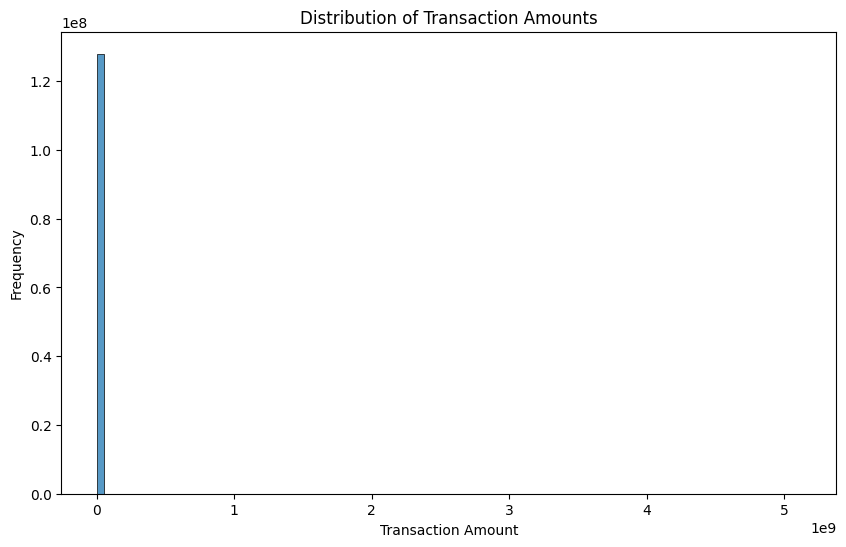

In [68]:


# Create a histogram of  transaction amounts in absolute values
plt.figure(figsize=(10, 6))
sns.histplot(df['AMOUNT'].abs(), bins=100)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()


Top 10 accounts with the most transactions:
                                                 ACC_ACCNO  Transaction Count
2026736  d721c2031c0a2bb9edf74c4e9fbc695558600728774325...            1961649
50439    0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af...            1223322
1684935  b2c659c9df147422555f1dd992f2277b6a2118601ee22d...            1108039
1921638  cbf9b4c883fb5e326d88159cf1b822039ac486bbd49573...             666788
1524971  a1d297f2e8ff86fdd328b734d8e269ef567f4a51397e50...             424038
1628305  acc7c287c2c0e7d913ae063475b8f124c706df959426ac...             318487
1586785  a8694c108958648118f2bc4834e08d45b241ab9bcbb46d...             220425
1566093  a63341b3c3baa6a2b460976d5c721fad66024da1d56ff6...             207629
42252    0476a43fa37180b26947ecdd70448656335affafe3dbf3...             193046
2052190  d9d47755788fffb1e7637a4b189a70eda752f9e9851606...             182464


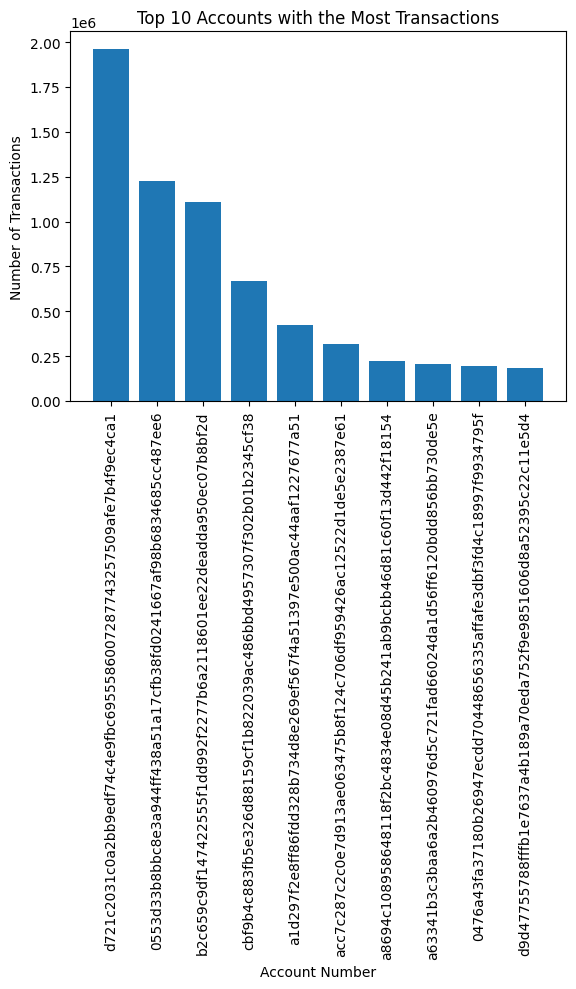

In [69]:
# Group by account number and count the number of transactions
transactions_per_account = df.groupby('ACC_ACCNO').size().reset_index(name='Transaction Count')

# Sort the dataframe by transaction count in descending order
transactions_per_account = transactions_per_account.sort_values(by='Transaction Count', ascending=False)

# Print the top 10 accounts with the most transactions
print("Top 10 accounts with the most transactions:")
print(transactions_per_account.head(10))

# Create a bar chart of the top 10 accounts with the most transactions
plt.bar(transactions_per_account['ACC_ACCNO'].head(10), transactions_per_account['Transaction Count'].head(10))
plt.xlabel("Account Number")
plt.ylabel("Number of Transactions")
plt.title("Top 10 Accounts with the Most Transactions")
plt.xticks(rotation=90)
plt.show()


In [70]:
print(transactions_per_account.head(10))

                                                 ACC_ACCNO  Transaction Count
2026736  d721c2031c0a2bb9edf74c4e9fbc695558600728774325...            1961649
50439    0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af...            1223322
1684935  b2c659c9df147422555f1dd992f2277b6a2118601ee22d...            1108039
1921638  cbf9b4c883fb5e326d88159cf1b822039ac486bbd49573...             666788
1524971  a1d297f2e8ff86fdd328b734d8e269ef567f4a51397e50...             424038
1628305  acc7c287c2c0e7d913ae063475b8f124c706df959426ac...             318487
1586785  a8694c108958648118f2bc4834e08d45b241ab9bcbb46d...             220425
1566093  a63341b3c3baa6a2b460976d5c721fad66024da1d56ff6...             207629
42252    0476a43fa37180b26947ecdd70448656335affafe3dbf3...             193046
2052190  d9d47755788fffb1e7637a4b189a70eda752f9e9851606...             182464


**Data without banker's account**

In [73]:
data_dir1 = Path('/content/drive/MyDrive/Data_hasking_without_banker_account')
ddf1 = dd.read_parquet(str(data_dir / '*.parquet'))
ddf1

,CUST_CUSTNO,ACC_BUSINESSTYPE,ACC_ACCNO,ACC_BUSINESSNO,ACC_CURRENCYISO,BUSINESSNO_TRANS,FK_CURRENCY,AMOUNT,AMOUNTORIG,BRANCH_OFFICE,CONTRA_ACCNO,CONTRA_ZIP,CONTRA_NAME,CSHYN,REASON1,REASON2,REASON4,TR_FLAG_01,ANALYTICAL_TRANS_CODE,TR_SP_01,TR_SP_02,TR_SP_03,TR_SP_04,TR_SP_05,TR_SP_10,VALUEDATE
npartitions=184,,,,,,,,,,,,,,,,,,,,,,,,,,
,string,string,string,string,string,string,string,float64,float64,string,string,string,string,string,string,string,string,string,string,string,string,string,string,string,float64,string
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [74]:
from dask.diagnostics import ProgressBar, ResourceProfiler, CacheProfiler

with ProgressBar():
    df1 = ddf1.compute()

[########################################] | 100% Completed | 16.21 s


In [76]:


# List to store transaction filenames
transaction_filenames = []

# Iterate over each file in the directory
for filename in os.listdir(data_dir1):
    if filename.endswith(".parquet"):
        transaction_filenames.append(filename)

# Print the list of transaction filenames
print("Transaction filenames:")
for filename in transaction_filenames:
    print(filename)

Transaction filenames:
DATA_TB_TRANSACTIONS_20230801.parquet
DATA_TB_TRANSACTIONS_20230802.parquet
DATA_TB_TRANSACTIONS_20230803.parquet
DATA_TB_TRANSACTIONS_20230804.parquet
DATA_TB_TRANSACTIONS_20230805.parquet
DATA_TB_TRANSACTIONS_20230806.parquet
DATA_TB_TRANSACTIONS_20230807.parquet
DATA_TB_TRANSACTIONS_20230808.parquet
DATA_TB_TRANSACTIONS_20230809.parquet
DATA_TB_TRANSACTIONS_20230810.parquet
DATA_TB_TRANSACTIONS_20230811.parquet
DATA_TB_TRANSACTIONS_20230812.parquet
DATA_TB_TRANSACTIONS_20230813.parquet
DATA_TB_TRANSACTIONS_20230814.parquet
DATA_TB_TRANSACTIONS_20230815.parquet
DATA_TB_TRANSACTIONS_20230816.parquet
DATA_TB_TRANSACTIONS_20230817.parquet
DATA_TB_TRANSACTIONS_20230818.parquet
DATA_TB_TRANSACTIONS_20230820.parquet
DATA_TB_TRANSACTIONS_20230822.parquet
DATA_TB_TRANSACTIONS_20230823.parquet
DATA_TB_TRANSACTIONS_20230824.parquet
DATA_TB_TRANSACTIONS_20230826.parquet
DATA_TB_TRANSACTIONS_20230827.parquet
DATA_TB_TRANSACTIONS_20230828.parquet
DATA_TB_TRANSACTIONS_202308

In [77]:
# Print the number of transaction files
print(f"Number of transaction files: {len(transaction_filenames)}")

Number of transaction files: 184


In [79]:


# Print the head of the dataframe
print(df1.head())

                                           CUST_CUSTNO ACC_BUSINESSTYPE  \
709  af3e6c0fbc6207736f6c97671d63e75cfc109129d67388...             CASA   
894  c8ea05c1c35e2ed34d5b1d3c32950cc8fb99074b92d251...             CASA   
902  2bdb75e6139a7717939d04a1ef7b8a7e17fe3261064a30...             CASA   
904  c8ea05c1c35e2ed34d5b1d3c32950cc8fb99074b92d251...             CASA   
907  2bdb75e6139a7717939d04a1ef7b8a7e17fe3261064a30...             CASA   

                                             ACC_ACCNO  \
709  3fdb8894344ab1289cec0efdd03ef870cfc23459f2e961...   
894  526978799ca402ab0f99c4c565917976bd22ee37dfb6f2...   
902  c60feae21e6d3a79d1b9dca82edf74b97b9e0bd93c461c...   
904  526978799ca402ab0f99c4c565917976bd22ee37dfb6f2...   
907  c60feae21e6d3a79d1b9dca82edf74b97b9e0bd93c461c...   

                                        ACC_BUSINESSNO ACC_CURRENCYISO  \
709  0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af...             VND   
894  0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af.

In [80]:

print(df1.shape)

(61035, 26)


In [81]:
# Group by account number and count the number of transactions
transactions_per_account = df1.groupby('ACC_ACCNO').size().reset_index(name='Transaction Count')

transactions_per_account


,ACC_ACCNO,Transaction Count
0,00006894303fe0685045ee57bc9e8edb1710f0ca9d3fb0...,8
1,0009162cc6938e774668c7adec27d2ec0b02fc2ff52edc...,1
2,00092ae971ae730d1fad61992fd980b18def353c4ac765...,2
3,0009d811b1561c6858d7d5eb82efaad6858c5de7b3cf8d...,2
4,00108a6ec65fd00c3f0581cbb8ad5994a18c748cddaf9f...,1
...,...,...
34160,ffe9983617772fa36137483febeda5a4d766fafee243ca...,1
34161,ffecad42dab543be95cab3f25bf65227ea02e9acd8015d...,2
34162,fff1c7d1ce84acf2445866ccef06aaa80a492939131e91...,2
34163,fff54bbef9dabf1a7bc4d1e6e45289c03cc8342d14071e...,1


In [82]:
df1[["CONTRA_ACCNO"]].describe()

,CONTRA_ACCNO
count,61035
unique,34192
top,c0e32d3f49bd04e1ab6328a6ab6769755eb281a232b56e...
freq,3675


In [86]:
df1['CUST_CUSTNO'].value_counts()

CUST_CUSTNO
6d681af72190882763ad5115560d38bb219881aa0c68f6915bf54bc9a3d6c254    3675
3126aa0a124750dfb4825398c73f4b90225aaa2c4c7d5755efbebdea33e17372     435
80fc134389d75d5fe92aee9968a6962bb74dd58d808e07ccc49c10c7eb208226     383
421ec731e03c483eb6ee8d4b3f456ffa06ac38fd084eaea2ceaa682a98e8f562     153
b55923a338813df190e5c0d8232651dd96c1d76411327ade60a42cffe7bfb6fa     149
                                                                    ... 
e5e7969a240cc583450dd23f769f938be2898b72eeecc2e1b825c473045e231e       1
6f11df6e87221ae2cf82da48257e1b7617e28998f3e0b36335ad1f345414643c       1
296c059ad798cbd5c0e94765f1271d5310da6b281ee052890743f36d1a2b9e2b       1
c786306a228987350fd420fff63377c4376aa6567b0f4429ad8585a4537d1144       1
c14adaab4a2604dd3d0cee10a04beb916315ab142986b59fed756e1f9e2a376a       1
Name: count, Length: 31036, dtype: int64

In [87]:
# Check the summary statistics of the AMOUNT column
print(df1['AMOUNT'].describe())

count    6.103500e+04
mean    -2.839835e+03
std      1.934437e+07
min     -7.000000e+08
25%     -1.000000e+03
50%      6.000000e-02
75%      1.000000e+03
max      7.000000e+08
Name: AMOUNT, dtype: float64


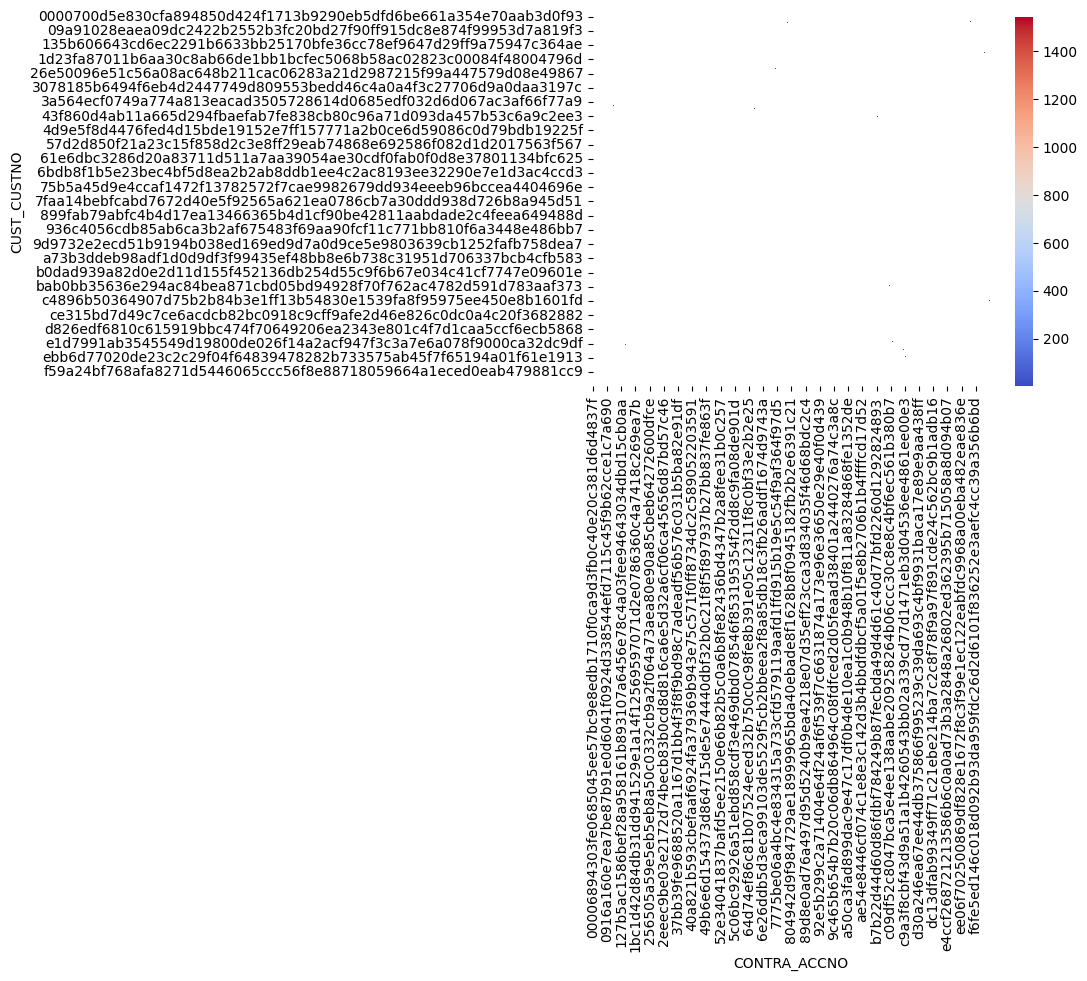

In [92]:


# Create a pivot table of the number of transactions by both accounts
transactions_by_both_accounts = pd.pivot_table(df1, values='ACC_ACCNO', index='CUST_CUSTNO', columns='CONTRA_ACCNO', aggfunc='count')

# Create a heatmap of the pivot table
sns.heatmap(transactions_by_both_accounts, cmap='coolwarm')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the heatmap
plt.show()

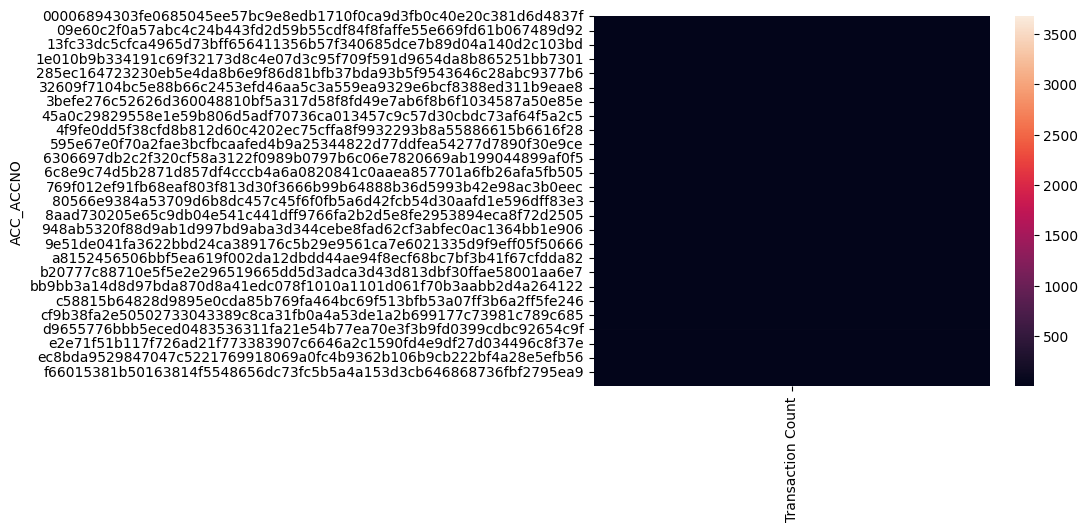

In [89]:

# Create a heatmap of the number of transactions per account
sns.heatmap(pd.pivot_table(transactions_per_account, values='Transaction Count', index='ACC_ACCNO'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the heatmap
plt.show()

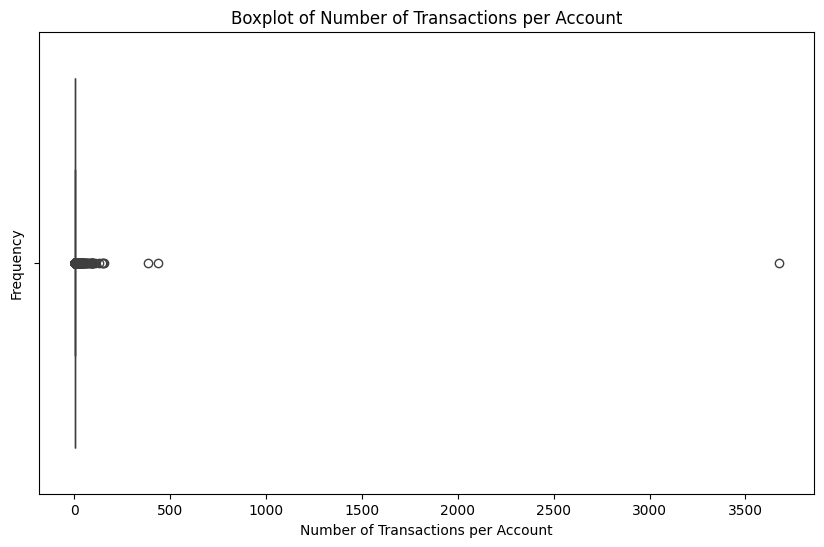

In [111]:

# Create a boxplot of the number of transactions per account
plt.figure(figsize=(10, 6))
sns.boxplot(x=transactions_per_account['Transaction Count'])
plt.xlabel('Number of Transactions per Account')
plt.ylabel('Frequency')
plt.title('Boxplot of Number of Transactions per Account')
plt.show()


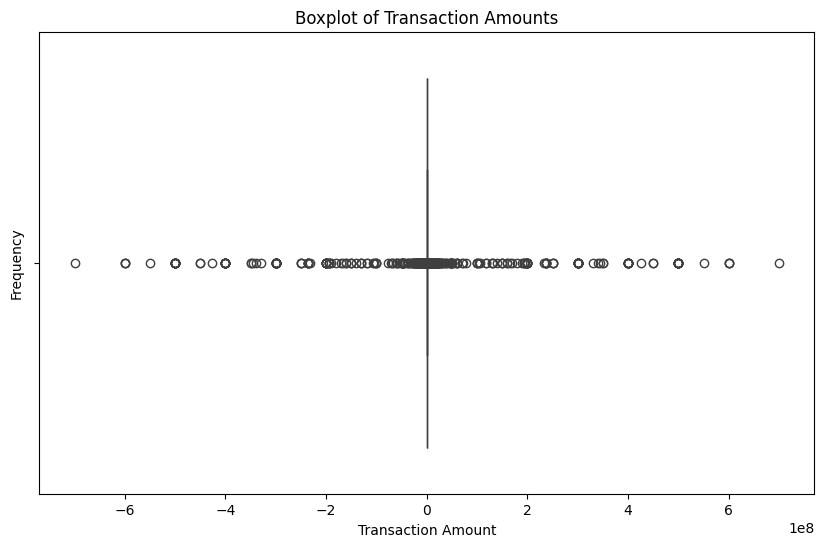

In [98]:
# Generate the boxplot for the amount of transactions
plt.figure(figsize=(10,6))
sns.boxplot(x=df1['AMOUNT'])
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Boxplot of Transaction Amounts')
plt.show()

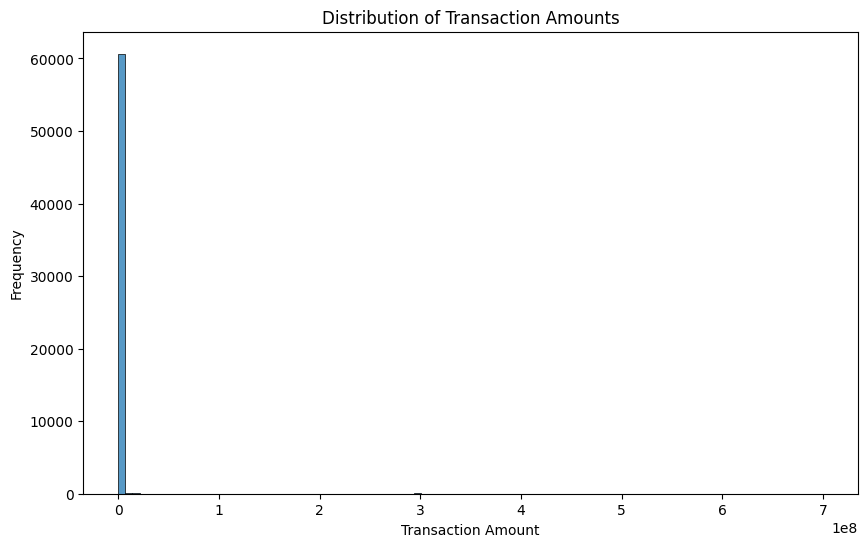

In [95]:

# Create a histogram of the transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(df1['AMOUNT'].abs(), bins=100)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

Top 10 accounts with the most transactions:
                                               ACC_ACCNO  Transaction Count
25678  c0e32d3f49bd04e1ab6328a6ab6769755eb281a232b56e...               3675
17788  85fc6f161976e0e173f940d87e5afd91859c5f173d8b34...                435
4757   2459e4325da978b6917e2761bbbde1069d1fd2f721340d...                383
3786   1cc3d2b25c314943375921b7d205e13ad32f1a171ee823...                153
22121  a63341b3c3baa6a2b460976d5c721fad66024da1d56ff6...                149
15003  70e195fbb9e1d70303066ed83885671e4cc7d04c9ae0f7...                143
30944  e7ee3be9c96dd1e273a9994b403bb7c4276ec2a4b598d3...                128
27073  cb44bfd8695230620f325be4826a467a737cf02cd9b4df...                106
7877   3bdad48ab7baad8c2a50b864b02cded1e16c4d61dfebd0...                100
24105  b558e334ca0814fa250d30af20126db5788681c1d1c153...                 97


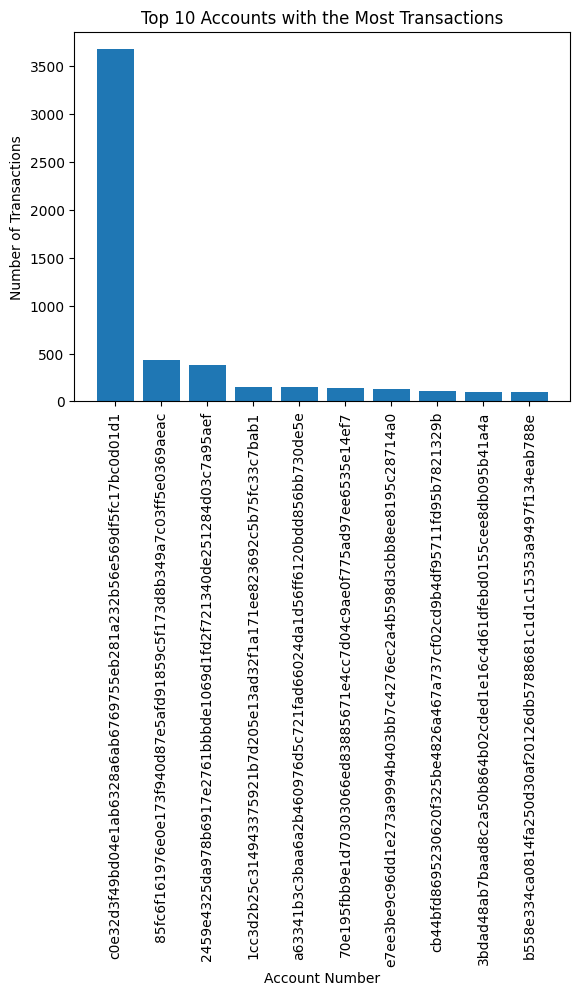

In [96]:

# Group by account number and count the number of transactions
transactions_per_account = df1.groupby('ACC_ACCNO').size().reset_index(name='Transaction Count')

# Sort the dataframe by transaction count in descending order
transactions_per_account = transactions_per_account.sort_values(by='Transaction Count', ascending=False)

# Print the top 10 accounts with the most transactions
print("Top 10 accounts with the most transactions:")
print(transactions_per_account.head(10))

# Create a bar chart of the top 10 accounts with the most transactions
plt.bar(transactions_per_account['ACC_ACCNO'].head(10), transactions_per_account['Transaction Count'].head(10))
plt.xlabel("Account Number")
plt.ylabel("Number of Transactions")
plt.title("Top 10 Accounts with the Most Transactions")
plt.xticks(rotation=90)
plt.show()


In [112]:
print(transactions_per_account.head(10))

                                               ACC_ACCNO  Transaction Count
25678  c0e32d3f49bd04e1ab6328a6ab6769755eb281a232b56e...               3675
17788  85fc6f161976e0e173f940d87e5afd91859c5f173d8b34...                435
4757   2459e4325da978b6917e2761bbbde1069d1fd2f721340d...                383
3786   1cc3d2b25c314943375921b7d205e13ad32f1a171ee823...                153
22121  a63341b3c3baa6a2b460976d5c721fad66024da1d56ff6...                149
15003  70e195fbb9e1d70303066ed83885671e4cc7d04c9ae0f7...                143
30944  e7ee3be9c96dd1e273a9994b403bb7c4276ec2a4b598d3...                128
27073  cb44bfd8695230620f325be4826a467a737cf02cd9b4df...                106
7877   3bdad48ab7baad8c2a50b864b02cded1e16c4d61dfebd0...                100
24105  b558e334ca0814fa250d30af20126db5788681c1d1c153...                 97


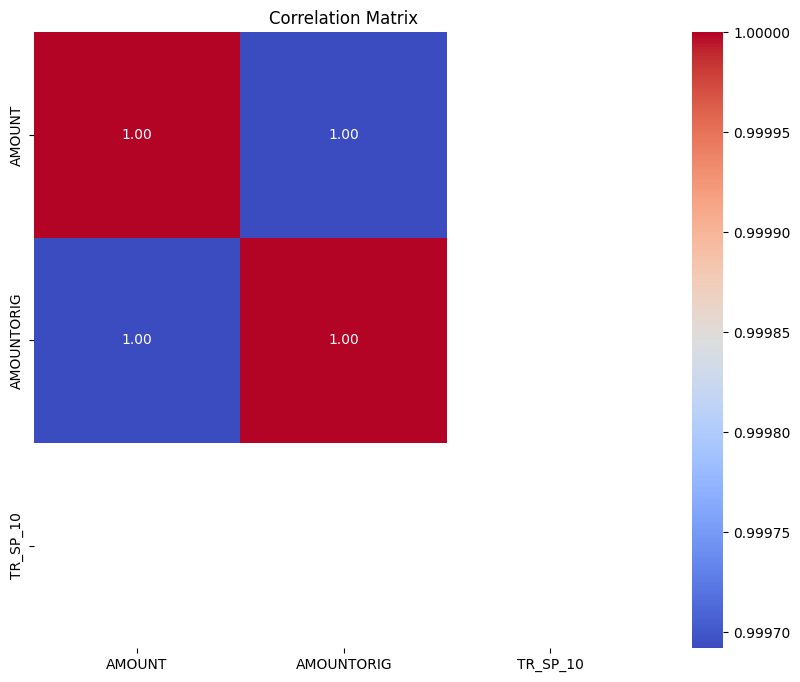

In [100]:
numeric_df = df1.select_dtypes(include=['float64', 'int64'])

# Step 2: Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Step 3: Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()